In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stocknews/upload_DJIA_table.csv
/kaggle/input/stocknews/Combined_News_DJIA.csv
/kaggle/input/stocknews/RedditNews.csv


---

# **Step 1: Introduction of the Dataset**

### **Overview of the Dataset**
The "Daily News for Stock Market Prediction" dataset provides:
1. **Daily aggregated news headlines**: These are collected over an eight-year period and represent public sentiment and potential market-driving events (Scraped from Reddit).
2. **Stock market prices**: Corresponding indices or stock data for the same period are included from Yahoo Finnance.

   ### **Key Features**:
- **News Headlines**: Contain the text data that can be preprocessed and converted to sentiment scores or embeddings.
- **Stock Indices/Prices**: Numerical data representing market movements.

### **Deep Learning Problemn Description**

The primary motivation for this project is to gain a deeper understanding of machine learning techniques for predicting financial trends while incorporating Natural Language Processing (NLP) tools. Predicting stock market movements has been an area of interest for years, but integrating the sentiment of top global news headlines introduces a unique and potentially powerful feature to model building. The goal is to develop a variety of Recurrent Neural Network (RNN) models, including those with Long Short-Term Memory (LSTM) units, to predict whether the Dow Jones Industrial Average (DJIA) stock price will increase or stay the same (label = 1) or decrease (label = 0) on a given day.

Several key questions guide this project:

1. **Sentiment Analysis**: How strongly does the sentiment of headlines correlate with stock price changes? Does it significantly influence the rise or fall of prices?  
2. **Time Lag Effects**: Is there a lag in the impact of sentiment? For instance, do news headlines from a week ago affect current stock prices?  
3. **Additional Financial Metrics**: What other financial indicators can be used to predict stock price movements?  
4. **Feature Combination**: Can the combination of sentiment values and financial metrics enhance the model's predictive power?  

By addressing these questions, the project aims to explore the interplay between news sentiment and financial data while evaluating the most important features for predicting stock price movements. Through RNN and LSTM tasks, we hope to build robust models that shed light on these relationships and deliver meaningful insights.


### **Importance and Key Features**
This dataset is contains:
- **Sentiment-Driven Analysis**: News often drives market behavior. Capturing sentiment trends can enhance stock price prediction models.
- **Real-World Applications**: The dataset reflects a realistic environment where temporal dependencies between news and stock prices exist.
- **Comprehensive Temporal Coverage**: Eight years of data allow for training robust models and testing their ability to generalize across market phases.

### **Key Features**:
- **News Headlines**: Contain the text data that can be preprocessed and converted to sentiment scores or embeddings.
- **Stock Indices/Prices**: Numerical data representing market movements.



- "1" when DJIA Adj Close value rose or stayed as the same;

 - "0" when DJIA Adj Close value decreased.

### **Source**:

https://www.kaggle.com/datasets/aaron7sun/stocknews/data

Sun, J. (2016, August). Daily News for Stock Market Prediction, Version 1. Retrieved 01 December 2024 from https://www.kaggle.com/aaron7sun/stocknews.

---

# **Step 2: Exploratory Data Analysis Procedures**

 ***Part 1: News Headlines Analysis***
 
 - Label Ratio (Looking for balanced Dataset)
 - Unique Wordcounts
 - Feature Engineering: Remove Stop Words and Combine Top 25 Columns into one
 - View top 20 words and count from combined text

***Part 2: DIJA Stock & Sentiment Analysis***

- Summary Statistics
- Closing Prices over Time
- Moving Averages (Rolling Avergaes)
- Headline News Sentiment Analysis
- Sentiment Scores vs. Date
- Rolling Averages for Sentiment
- Correlation between Sentiment Score and Label
- Compare Stock Price versus Sentiment Score
   

## **EDA Part 1: Headlines Analysis**

In [2]:
news_data = pd.read_csv('/kaggle/input/stocknews/Combined_News_DJIA.csv')
# Display the first 10 rows and the first 5 columns
print(news_data.iloc[:10, :5])

         Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   
5  2008-08-15      1  b"Mom of missing gay man: Too bad he's not a 2...   
6  2008-08-18      0  b'In an Afghan prison, the majority of female ...   
7  2008-08-19      0  b"Man arrested and locked up for five hours af...   
8  2008-08-20      1  b'Two elderly Chinese women have been sentence...   
9  2008-08-21      1  b"British resident held in Guantanamo Bay wins...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2     

### *Observe if the Label column is balanced (i.e., whether there are similar numbers of 0s and 1s).*

Label
1    1065
0     924
Name: count, dtype: int64


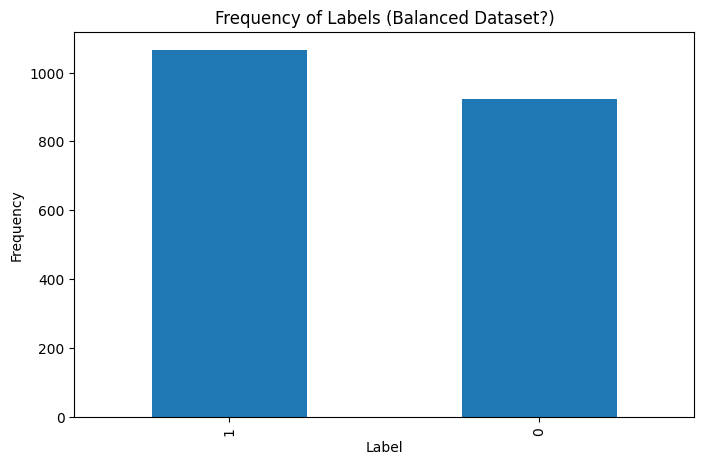

In [3]:
import matplotlib.pyplot as plt

# Frequency of labels
label_counts = news_data['Label'].value_counts()
print(label_counts)
# Plot
label_counts.plot(kind='bar', figsize=(8, 5), title="Frequency of Labels (Balanced Dataset?)")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()


### *Unique Word Count*

In [4]:
from collections import Counter
import re

# Combine Top1 to Top25 columns
top_columns = [f'Top{i}' for i in range(1, 26)]
combined_headlines = news_data[top_columns].fillna('').apply(lambda row: ' '.join(row), axis=1)

# Tokenize and count unique words
tokenized_words = [word.lower() for row in combined_headlines for word in re.findall(r'\b\w+\b', row)]
unique_word_count = len(set(tokenized_words))

print(f"Number of unique words in the first 25 headline columns: {unique_word_count}")


Number of unique words in the first 25 headline columns: 34744


### *Feature Engineering: Remove Stop Words and Combine Top 25 Columns into one column*

In [5]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))

# Preprocess: tokenize, lowercase, remove 'b'
def preprocess_text(row):
    words = re.findall(r'\b\w+\b', row.lower())
    filtered_words = [word for word in words if word not in stop_words and word != 'b']
    
    return ' '.join(filtered_words)

# Apply preprocessing function to the combined headlines (all 25) 
news_data['combined_text'] = combined_headlines.apply(preprocess_text)

print(news_data[['Date', 'combined_text']].head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
         Date                                      combined_text
0  2008-08-08  georgia downs two russian warplanes countries ...
1  2008-08-11  wont america nato help us wont help us help ir...
2  2008-08-12  remember adorable 9 year old sang opening cere...
3  2008-08-13  u refuses israel weapons attack iran report pr...
4  2008-08-14  experts admit legalise drugs war south osetia ...


### *View top 20 words and count from combined text*

In [6]:
from collections import Counter
import re

# Filter the combined_text by Label
text_label_1 = ' '.join(news_data[news_data['Label'] == 1]['combined_text'])
text_label_0 = ' '.join(news_data[news_data['Label'] == 0]['combined_text'])

# Tokenize the text for each label
words_label_1 = re.findall(r'\b\w+\b', text_label_1)
words_label_0 = re.findall(r'\b\w+\b', text_label_0)

# Count word frequencies for each label
counter_label_1 = Counter(words_label_1)
counter_label_0 = Counter(words_label_0)

# Get the most common words for each label
top_words_label_1 = counter_label_1.most_common(20)
top_words_label_0 = counter_label_0.most_common(20)

print("Top 20 Words for Label = 1 (DJIA Increased):")
for word, count in top_words_label_1:
    print(f"{word}: {count}")

print("\nTop 20 Words for Label = 0 (DJIA Decreased):")
for word, count in top_words_label_0:
    print(f"{word}: {count}")

Top 20 Words for Label = 1 (DJIA Increased):
us: 1612
says: 1394
new: 1257
world: 1184
israel: 1178
china: 1164
government: 1121
police: 1053
u: 1022
people: 981
russia: 926
year: 891
war: 856
000: 822
uk: 808
years: 807
president: 795
one: 754
first: 734
killed: 722

Top 20 Words for Label = 0 (DJIA Decreased):
us: 1432
says: 1170
new: 1168
world: 1080
israel: 994
china: 970
government: 956
people: 913
police: 913
u: 872
russia: 783
000: 782
war: 742
years: 739
year: 711
iran: 677
one: 662
israeli: 640
president: 633
uk: 624


## **EDA Part 2: DIJA Stock & Sentiment Analysis**

         Date          Open          High           Low         Close  \
0  2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1  2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2  2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3  2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4  2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   

      Volume     Adj Close  
0   82160000  17949.369141  
1  133030000  17929.990234  
2  106380000  17694.679688  
3  112190000  17409.720703  
4  138740000  17140.240234  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 

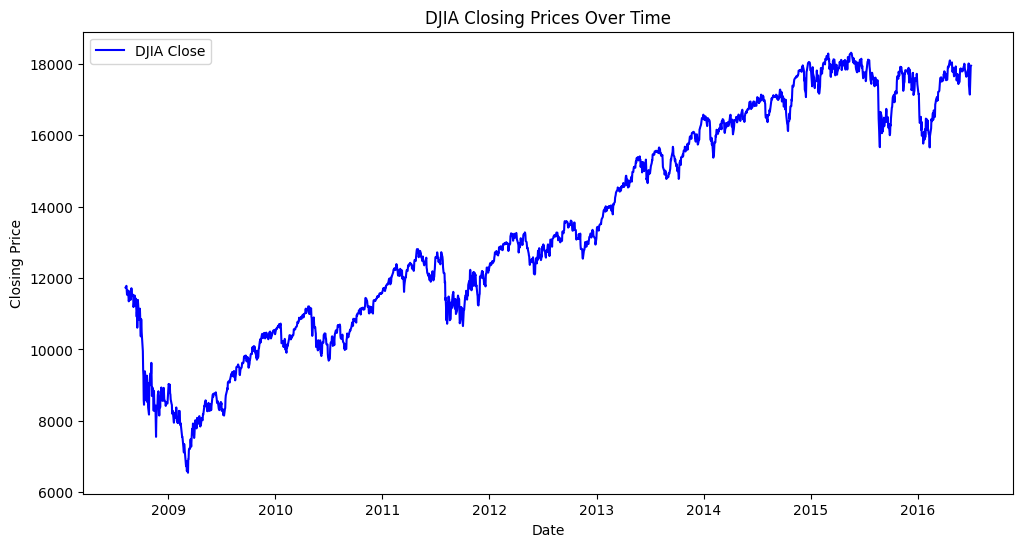

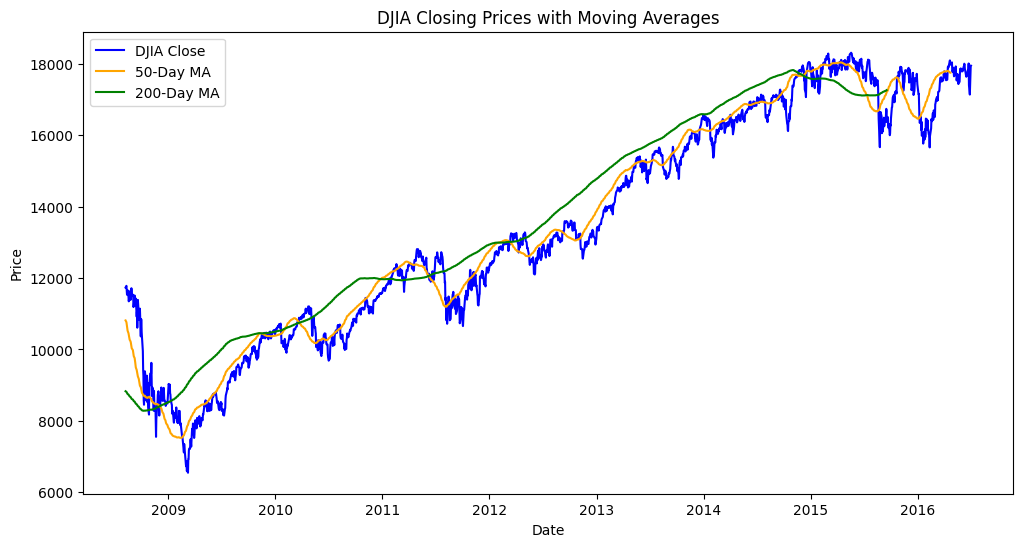

In [7]:
djia_data = pd.read_csv('/kaggle/input/stocknews/upload_DJIA_table.csv')
print(djia_data.head())

# Check for missing values and data types
print(djia_data.info())

# Display summary statistics
print(djia_data.describe())
# Convert 'Date' column to datetime format
djia_data['Date'] = pd.to_datetime(djia_data['Date'])

import matplotlib.pyplot as plt

# Plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(djia_data['Date'], djia_data['Close'], label='DJIA Close', color='blue')
plt.title('DJIA Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Calculate moving averages (rolling averages)
djia_data['50_MA'] = djia_data['Close'].rolling(window=50).mean()
djia_data['200_MA'] = djia_data['Close'].rolling(window=200).mean()

# Plot closing prices with moving averages
plt.figure(figsize=(12, 6))
plt.plot(djia_data['Date'], djia_data['Close'], label='DJIA Close', color='blue')
plt.plot(djia_data['Date'], djia_data['50_MA'], label='50-Day MA', color='orange')
plt.plot(djia_data['Date'], djia_data['200_MA'], label='200-Day MA', color='green')
plt.title('DJIA Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### **EDA: Worldwide News Sentiment Analysis**

In [8]:
# Sentiment analysis
from textblob import TextBlob

# Function to calculate sentiment from TExtBlob
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Add sentiment scores from combined headlines (25)
news_data['sentiment'] = news_data['combined_text'].apply(calculate_sentiment)

# Convert Date to datetime and extract month/year
news_data['Date'] = pd.to_datetime(news_data['Date'])
news_data['YearMonth'] = news_data['Date'].dt.to_period('M')

# Calculate average sentiment by month/year
average_sentiment = news_data.groupby('YearMonth')['sentiment'].mean()
print(average_sentiment.head(12))

YearMonth
2008-08   -0.006481
2008-09   -0.023386
2008-10    0.012935
2008-11   -0.005295
2008-12    0.012929
2009-01   -0.013819
2009-02   -0.021508
2009-03   -0.028168
2009-04    0.004752
2009-05    0.013132
2009-06    0.013739
2009-07   -0.020555
Freq: M, Name: sentiment, dtype: float64


## *Plot Date vs. Label*

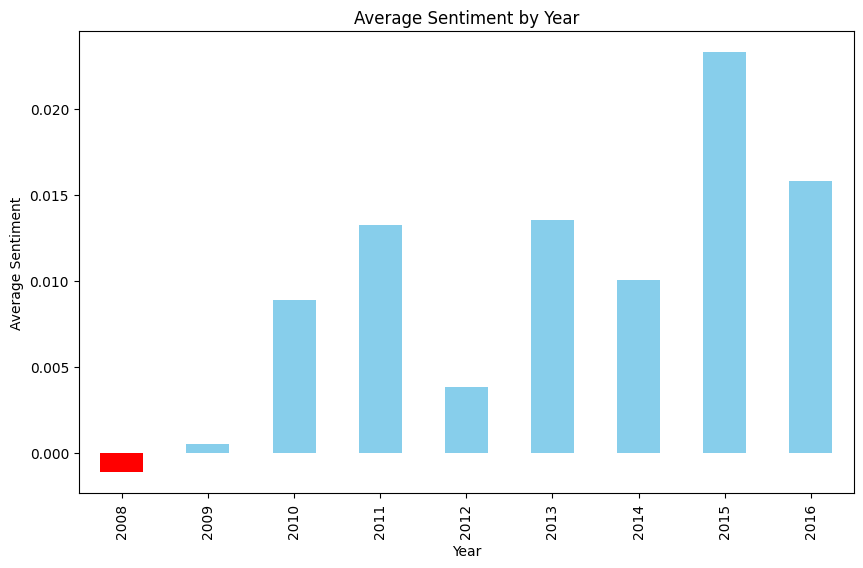

In [9]:
# Group by year and calculate the average sentiment
sentiment_by_year = news_data.groupby(news_data['Date'].dt.year)['sentiment'].mean()

# Create a color list based on the sentiment values
colors = ['red' if value < 0 else 'skyblue' for value in sentiment_by_year]

# Plot aggregated data with conditional colors
plt.figure(figsize=(10, 6))
sentiment_by_year.plot(kind='bar', color=colors)
plt.title("Average Sentiment by Year")
plt.xlabel("Year")
plt.ylabel("Average Sentiment")
plt.show()

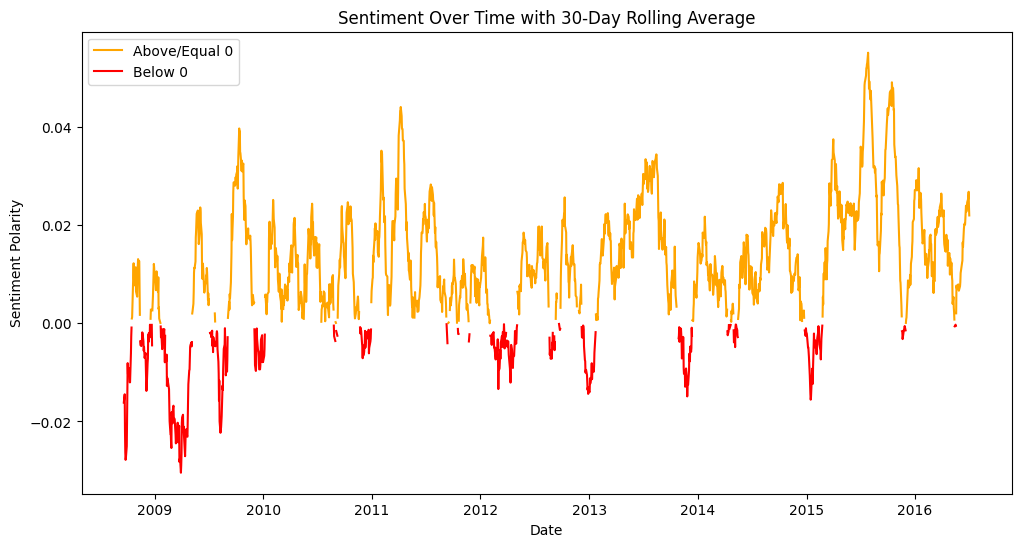

In [10]:
# Create a rolling average for sentiment (e.g., 30 days)
news_data['sentiment_rolling_avg'] = news_data['sentiment'].rolling(window=30).mean()

# Plot the rolling average with conditional coloring
plt.figure(figsize=(12, 6))

# Plot values above or equal to 0 in orange
plt.plot(
    news_data['Date'], 
    news_data['sentiment_rolling_avg'].where(news_data['sentiment_rolling_avg'] >= 0), 
    label='Above/Equal 0', 
    color='orange'
)

# Plot values below 0 in red
plt.plot(
    news_data['Date'], 
    news_data['sentiment_rolling_avg'].where(news_data['sentiment_rolling_avg'] < 0), 
    label='Below 0', 
    color='red'
)

# Add titles and labels
plt.title("Sentiment Over Time with 30-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Sentiment Polarity")
plt.legend()
plt.show()

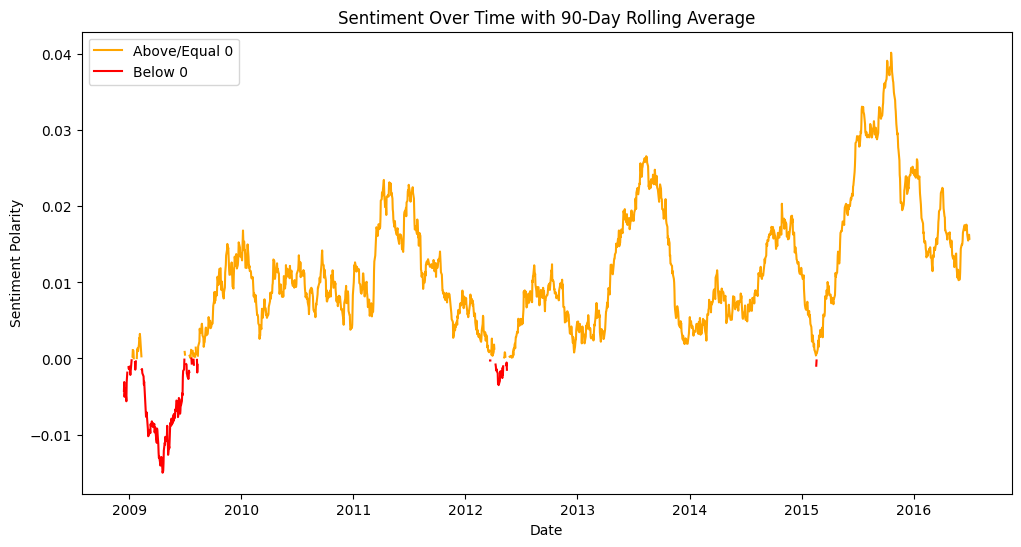

In [11]:
# Create a rolling average for sentiment (e.g., 90 days)
news_data['sentiment_rolling_avg'] = news_data['sentiment'].rolling(window=90).mean()

# Plot the rolling average with conditional coloring
plt.figure(figsize=(12, 6))

# Plot values above or equal to 0 in orange
plt.plot(
    news_data['Date'], 
    news_data['sentiment_rolling_avg'].where(news_data['sentiment_rolling_avg'] >= 0), 
    label='Above/Equal 0', 
    color='orange'
)

# Plot values below 0 in red
plt.plot(
    news_data['Date'], 
    news_data['sentiment_rolling_avg'].where(news_data['sentiment_rolling_avg'] < 0), 
    label='Below 0', 
    color='red'
)

# Add titles and labels
plt.title("Sentiment Over Time with 90-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Sentiment Polarity")
plt.legend()
plt.show()

### **What we know about some of the lowest sentiment in relation to possible stock events**
- **The Great Recession (2009)**
The global economic recession was a major focus in 2009. The American Recovery and Reinvestment Act of 2009 was passed to provide economic stimulus to the country.
- Lasting from December 2007 to June 2009, this economic downturn was the longest since World War II. The Great Recession began in December 2007 and ended in June 2009, which makes it the longest recession since World War II.
- **January 2015 including the **terrorist attack in Paris** on Charlie Hebdo.
- A plethora of **Natural Disasters occured in the year 2012**, such as hurricane Sandy and Typhoon Pablo that killed over 1,000 people in the Phillipeanes. 

## Correlation Between Sentiment Scores and Label
We’ll calculate and display the correlation between sentiment and stock labels.

Correlation between sentiment and Label:
           sentiment     Label
sentiment   1.000000  0.006967
Label       0.006967  1.000000


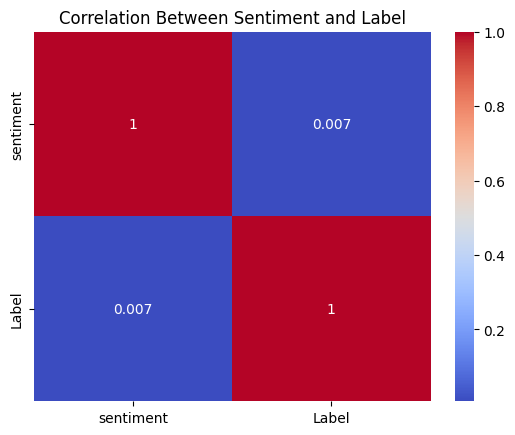

In [12]:
import seaborn as sns

# Correlation between sentiment and label
correlation = news_data[['sentiment', 'Label']].corr()
print("Correlation between sentiment and Label:")
print(correlation)

# Heatmap to visualize correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Sentiment and Label")
plt.show()

## Comparing DIJA Stock Price and Sentiment Labels:

Average Sentiment by Label:
Label
0    0.009829
1    0.010584
Name: sentiment, dtype: float64


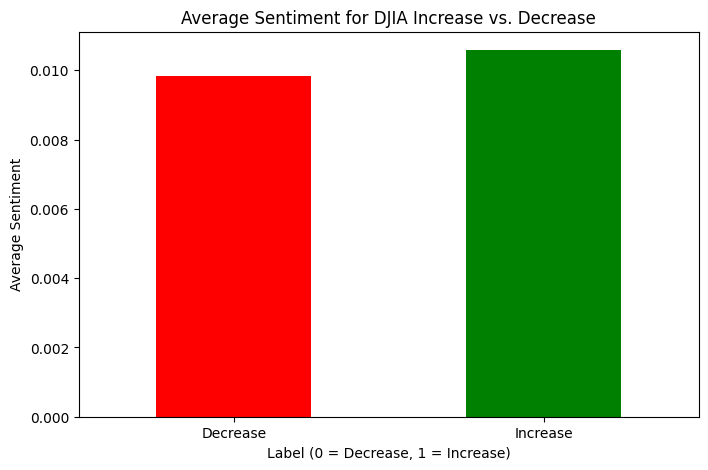

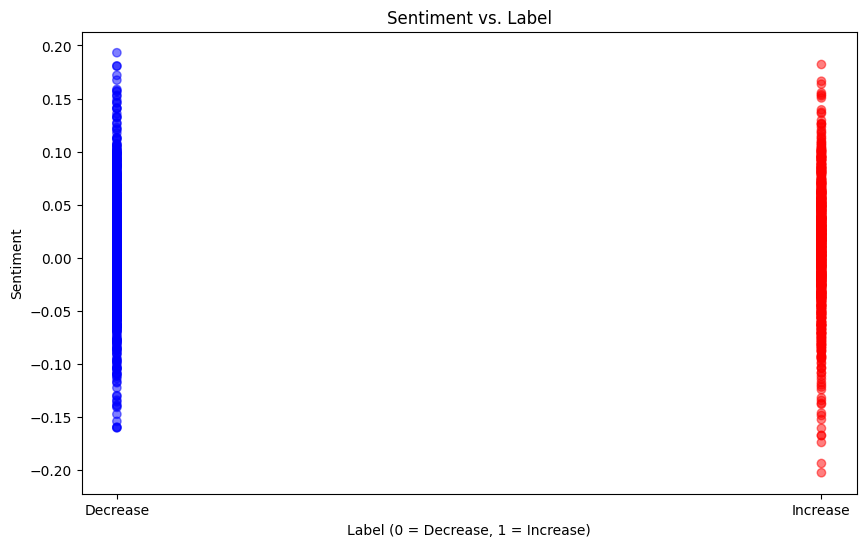

Correlation between sentiment and Label:
           sentiment     Label
sentiment   1.000000  0.006967
Label       0.006967  1.000000


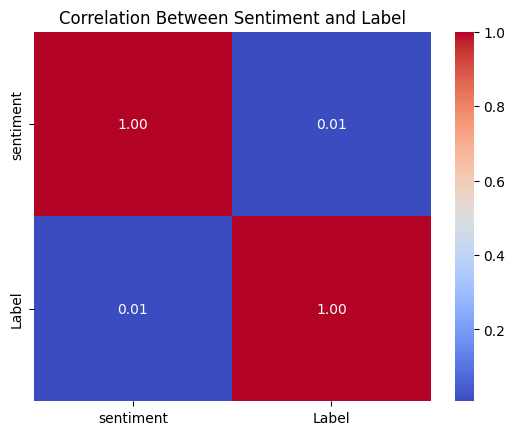

In [13]:
# Calculate average sentiment for each label
average_sentiment_by_label = news_data.groupby('Label')['sentiment'].mean()

# Print the results
print("Average Sentiment by Label:")
print(average_sentiment_by_label)

# Plot the comparison
average_sentiment_by_label.plot(kind='bar', color=['red', 'green'], figsize=(8, 5))
plt.title("Average Sentiment for DJIA Increase vs. Decrease")
plt.xlabel("Label (0 = Decrease, 1 = Increase)")
plt.ylabel("Average Sentiment")
plt.xticks([0, 1], ['Decrease', 'Increase'], rotation=0)
plt.show()

# Scatter plot of sentiment vs. label
plt.figure(figsize=(10, 6))
plt.scatter(news_data['Label'], news_data['sentiment'], alpha=0.5, c=news_data['Label'], cmap='bwr')
plt.title("Sentiment vs. Label")
plt.xlabel("Label (0 = Decrease, 1 = Increase)")
plt.ylabel("Sentiment")
plt.xticks([0, 1], ['Decrease', 'Increase'])
plt.show()

# Calculate correlation between sentiment and label
correlation = news_data[['sentiment', 'Label']].corr()
print("Correlation between sentiment and Label:")
print(correlation)

# Heatmap to visualize the correlation
import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Sentiment and Label")
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare data
X = news_data[['sentiment']]
y = news_data['Label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

---

## **Analysis of Sentiment vs. DJIA Movement**

### **1. Average Sentiment by Label**
- The bar chart shows that the average sentiment for days when the DJIA increased (`Label = 1`) is slightly higher (~0.0177) compared to days when it decreased (`Label = 0`, ~0.0115).
- This indicates that positive sentiment in the news headlines may be slightly correlated with market gains, but the difference is minimal, suggesting limited predictive power from sentiment alone.

---

### **2. Sentiment vs. Label Scatter Plot**
- The scatter plot shows a dense clustering of sentiment values around 0 for both `Label = 0` and `Label = 1`.
- While days with higher sentiment values are more likely associated with `Label = 1` (red points), the overlap between the two labels is substantial. This reinforces the idea that sentiment alone is not a strong differentiator between market increases and decreases.

---

### **3. Correlation Between Sentiment and Label**
- The heatmap and correlation coefficient (0.035) demonstrate a very weak positive correlation between sentiment and the DJIA movement label.
- This result aligns with the minimal difference in average sentiment and indicates that sentiment, as measured, has limited predictive power for DJIA movement.

---

### **4. Logistic Regression Performance**
- The logistic regression model achieved an accuracy of 57%, which is only slightly better than random guessing (50% for a binary classification).
- The confusion matrix highlights that the model struggles to distinguish between `Label = 0` and `Label = 1` effectively, as it primarily predicts `Label = 1` regardless of the actual value.
- This suggests that sentiment, as the sole feature, is insufficient for reliably predicting DJIA movements.


### **Conclusion**
While there is a slight relationship between sentiment and DJIA movement, it is weak and not statistically significant. For improved prediction, additional features—such as historical stock prices, technical indicators, or more sophisticated sentiment analysis methods—are needed to enhance the model's predictive capabilities.

---

# **Step 3: Analysis (Model Building and Training)**

First, knowing a bit of background on finnancial learning, we are going to calculate and add some additional finnancial metrics. 

### **Feature Engineering**
We will use the following features:
- Sentiment Score (sentiment)
- DJIA Historical Prices: Add columns like Close, Open, High, and Low.

### **Create new Finanncial Metrics**
- Technical Indicators:
- Daily Percentage Change: (Close - Open) / Open
- Rolling Averages: 50-day and 200-day moving averages.

### **Normalize & Prepare Data for LTSM**

- LSTMs require sequential input. We must convert the data into sequences.

### *Merge Headline and DIJA Historical Datasets*

In [14]:
# Load the DJIA data
djia_data = pd.read_csv('/kaggle/input/stocknews/upload_DJIA_table.csv')

# Ensure 'Date' columns are datetime
news_data['Date'] = pd.to_datetime(news_data['Date'])
djia_data['Date'] = pd.to_datetime(djia_data['Date'])

# Merge the datasets on 'Date'
merged_data = pd.merge(news_data, djia_data, on='Date')

# Specify the columns to keep
columns_to_keep = [
    'Date', 'Label', 'combined_text', 'sentiment', 'YearMonth',
    'sentiment_rolling_avg', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'
]

# Keep only the specified columns in the DataFrame
merged_data = merged_data[columns_to_keep]

# Display merged dataset
print(merged_data.head())

        Date  Label                                      combined_text  \
0 2008-08-08      0  georgia downs two russian warplanes countries ...   
1 2008-08-11      1  wont america nato help us wont help us help ir...   
2 2008-08-12      0  remember adorable 9 year old sang opening cere...   
3 2008-08-13      0  u refuses israel weapons attack iran report pr...   
4 2008-08-14      1  experts admit legalise drugs war south osetia ...   

   sentiment YearMonth  sentiment_rolling_avg          Open          High  \
0  -0.043382   2008-08                    NaN  11432.089844  11759.959961   
1   0.107374   2008-08                    NaN  11729.669922  11867.110352   
2  -0.002219   2008-08                    NaN  11781.700195  11782.349609   
3   0.005842   2008-08                    NaN  11632.809570  11633.780273   
4   0.030260   2008-08                    NaN  11532.070312  11718.280273   

            Low         Close     Volume     Adj Close  
0  11388.040039  11734.320312  2128

In [15]:
# Add daily percentage change
merged_data['pct_change'] = (merged_data['Close'] - merged_data['Open']) / merged_data['Open']

# Add rolling averages 
merged_data['50_MA'] = merged_data['Close'].rolling(window=50).mean()
merged_data['200_MA'] = merged_data['Close'].rolling(window=200).mean()

# Include Volume
features = ['sentiment', 'Close', 'pct_change', '50_MA', '200_MA', 'Volume']

# Drop rows with NaN values due to rolling averages
merged_data = merged_data.dropna()

# Normalize all features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

merged_data[features] = scaler.fit_transform(merged_data[features])

print(merged_data[features + ['Label']].head(10))

     sentiment     Close  pct_change     50_MA    200_MA    Volume  Label
199   0.435669  0.032164    0.809851  0.000000  0.057521  0.473464      1
200   0.407998  0.015099    0.352683  0.002163  0.055722  0.429000      0
201   0.417381  0.025308    0.693417  0.004176  0.053953  0.436325      1
202   0.401565  0.034804    0.683202  0.006201  0.052307  0.546334      1
203   0.704332  0.056554    0.832274  0.008838  0.050834  0.535392      1
204   0.486068  0.058465    0.587526  0.011758  0.049328  0.385061      1
205   0.677757  0.052009    0.487930  0.013555  0.047765  0.376716      0
206   0.618862  0.059387    0.654059  0.015732  0.046336  0.354522      1
207   0.567713  0.060655    0.578120  0.017755  0.044981  0.381058      1
208   0.508653  0.060789    0.570739  0.019433  0.043592  0.280075      1


### **Normalize & Prepare Data for LTSM**

In [16]:
# Define sequence length
sequence_length = 60  # 60 days of data

# Prepare sequences and labels
X = []
y = []

for i in range(sequence_length, len(merged_data)):
    # Extract sequence of features (including Volume)
    X.append(merged_data[features].iloc[i-sequence_length:i].values)
    # Extract corresponding label
    y.append(merged_data['Label'].iloc[i])

X = np.array(X)
y = np.array(y)

# Display shapes
print(f"Shape of X: {X.shape}")  # Should include all features, including Volume
print(f"Shape of y: {y.shape}")


Shape of X: (1730, 60, 6)
Shape of y: (1730,)


### **Train-Test Split with Updated Data**

In [17]:
from sklearn.model_selection import train_test_split

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")


Training Data Shape: (1384, 60, 6)
Test Data Shape: (346, 60, 6)


---
## **Step 3b: Build and Train the LSTM Models**

A total of **5 models** and then **2 iterative combos** were built and evaluted to predict the date specific labels. Then, simple ML methods such as RFC, LR, etc were tested as well. 
- Model 1: test Accuracy **0.58**
- Model 2: test Accuracy **0.54**
- Model 3: test Accuracy **0.51**
- Model 3b: test Accuracy **0.50**
- Model 4: test Accuracy **0.59**
- Model 5: test Accuracy **0.58**
- Iterative Model 4: Best Combo **0.54**
- Iterative Model 5: Best Combo **0.54**
- Best Supervised Machine Learning Model: 

## **Model 1:**
#### **Test Accuracy = 0.58**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')  # Binary classification --> Label 0 or 1
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5084 - loss: 0.6947 - val_accuracy: 0.5838 - val_loss: 0.6806
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5304 - loss: 0.6928 - val_accuracy: 0.5289 - val_loss: 0.6885
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5213 - loss: 0.6916 - val_accuracy: 0.5173 - val_loss: 0.6915
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5213 - loss: 0.6919 - val_accuracy: 0.5838 - val_loss: 0.6871
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4870 - loss: 0.6940 - val_accuracy: 0.5838 - val_loss: 0.6838
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5225 - loss: 0.6927 - val_accuracy: 0.5838 - val_loss: 0.6852
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5513 - loss: 0.6900 - val_accuracy: 0.5867 - val_loss: 0.6871
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5222 - loss: 0.6913 - val_accuracy: 0.5838 - val_los

### **Evaluate and Analyze the Model**

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Test Accuracy: 0.58


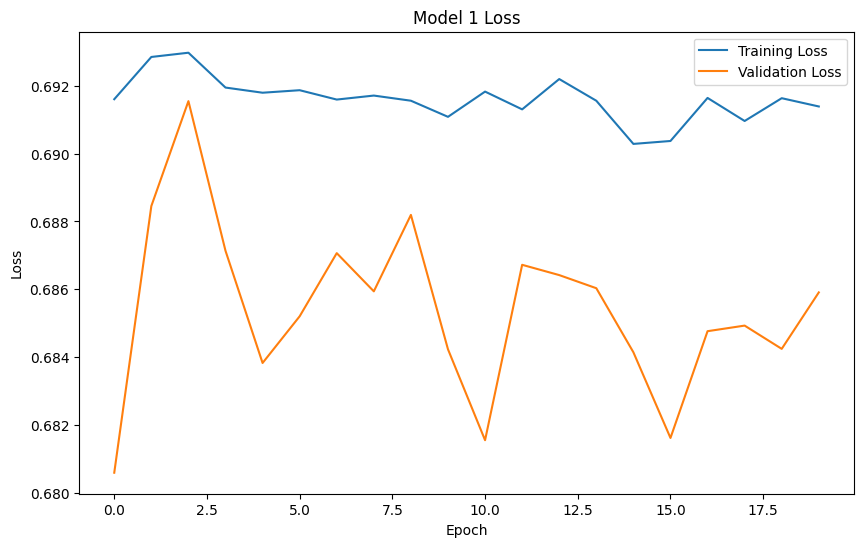

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model 1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Possible Improvements to the Model

- Add More LSTM Layers: Deepen the network to potentially capture more complex patterns in the data.
- Adjust Dropout Rates: Fine-tune dropout to reduce overfitting while preserving model learning capacity.
- Incorporate Batch Normalization: Normalize the activations between layers to stabilize training.
- Increase Sequence Length: Allow the model to consider a longer historical context (e.g., 90 days instead of 60).
- Optimize Learning Rate: Use a learning rate scheduler or fine-tune the learning rate for better convergence.
- Early Stopping: Prevent overtraining by monitoring validation loss and stopping early if performance stagnates.

## **Model 2**
#### **Test Accuracy = 0.55**

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,825 (210.25 KB)

 Trainable params: 53,569 (209.25 KB)

 Non-trainable params: 256 (1.00 KB)

None
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4800 - loss: 0.8634 - val_accuracy: 0.5838 - val_loss: 0.6905
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5173 - loss: 0.7856 - val_accuracy: 0.5434 - val_loss: 0.6909
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5285 - loss: 0.7523 - val_accuracy: 0.5838 - val_loss: 0.6866
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5159 - loss: 0.7347 - val_accuracy: 0.5145 - val_loss: 0.6937
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4897 - loss: 0.7454 - val_accuracy: 0.5116 - val_loss: 0.6918
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5196 - loss: 0.7227 - val_accuracy: 0.5347 - val_loss: 0.6889
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5337 - loss: 0.7061 - val_accuracy: 0.5549 - val_loss: 0.6859
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5217 - loss: 0.7136 - val_accuracy: 0.552

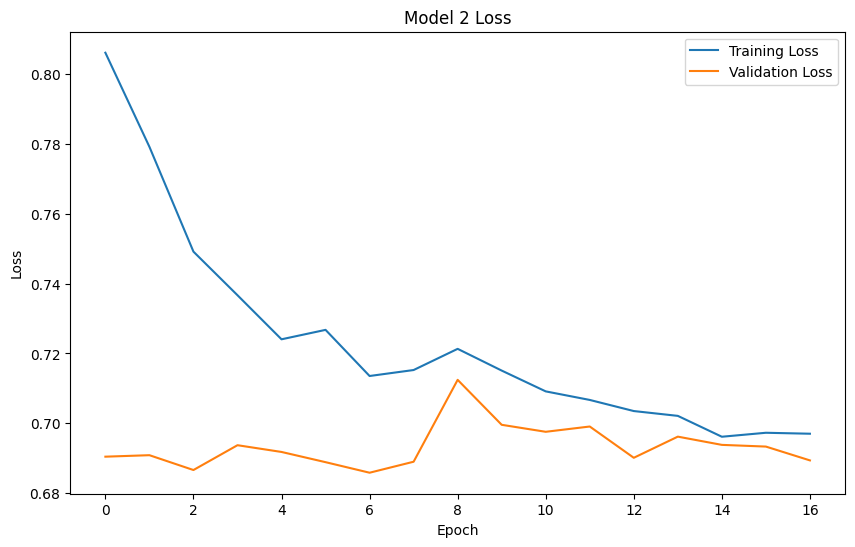

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Build the improved LSTM model
model2 = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(units=64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')  
])

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Display model summary
print(model2.summary())

# Train the improved model
history2 = model2.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  # Enable early stopping
)

# Evaluate the model
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)
print(f"Model 2 Test Accuracy: {test_accuracy2:.2f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model 2 Analysis
- Model 2 does not seem to improve significantly over Model 1. 
- Test Accuracy:
- - Model 2 achieves a test accuracy of 56%, slightly lhigher than Model 1's 51%. This suggests that the additional architectural complexity did not effectively capture more meaningful patterns in the data.
- Training and Validation Loss:
- - Training loss decreases initially but plateaus quickly, indicating limited learning capability.
- Validation loss remains nearly constant, suggesting the model struggles to generalize to unseen data and is not effectively leveraging the added features or deeper architecture.
- Overfitting or Underfitting?
Both training and validation loss remain relatively high and stable, suggesting underfitting. The model may not be complex enough or may require better feature engineering to learn useful representations.

## **Model 3**
**Test Accuracy = 0.54**

---
### Improvements for Model 3
To address the underfitting and improve Model 3, we can:
- Include Additional Features:
- Add more technical indicators (e.g., Relative Strength Index, Bollinger Bands) or sentiment trends (e.g., rolling averages of sentiment).
- Experiment with Larger Architectures:
- Increase the number of LSTM units or add an additional LSTM layer.
- Optimize Sequence Length:
- Try longer sequence lengths (e.g., 120 days) to capture more historical context.
- Hyperparameter Tuning:
- Adjust dropout rates, learning rate, and batch size to fine-tune the training process.
- Ensemble Models:
- Combine predictions from multiple models (e.g., LSTM + Random Forest) to improve robustness.
- Class Imbalance Handling:
- If the dataset is imbalanced (more 0s than 1s), use oversampling or class weights to address it.

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5364 - loss: 0.7902 - val_accuracy: 0.5087 - val_loss: 0.6928
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4827 - loss: 0.7682 - val_accuracy: 0.4855 - val_loss: 0.6934
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4900 - loss: 0.7428 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5014 - loss: 0.7435 - val_accuracy: 0.6040 - val_loss: 0.6823
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4838 - loss: 0.7361 - val_accuracy: 0.5231 - val_loss: 0.6903
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5080 - loss: 0.7378 - val_accuracy: 0.5289 - val_loss: 0.7014
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5410 - loss: 0.7069 - val_accuracy: 0.5751 - val_loss: 0.6832
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5046 - loss: 0.7247 - val_accuracy: 0.5347 - v

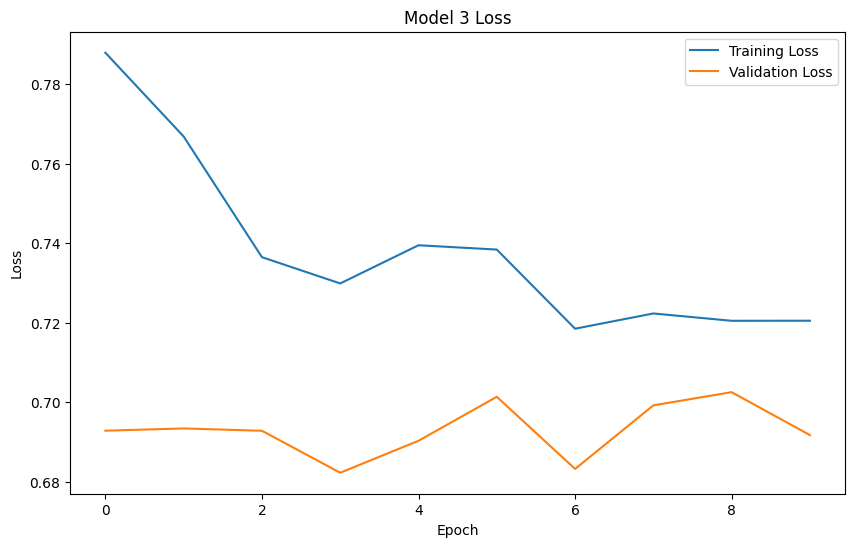

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Build Model 3
model3 = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(units=64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')  # Binary classification
])

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam
model3.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history3 = model3.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  # Enable early stopping
)

# Evaluate the model
test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test)
print(f"Model 3 Test Accuracy: {test_accuracy3:.2f}")


# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model 3 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Model 3 (with lower Learning Rate)**
**Test Accuracy = 0.53**

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4806 - loss: 0.8292 - val_accuracy: 0.5029 - val_loss: 0.6933
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5051 - loss: 0.7502 - val_accuracy: 0.4798 - val_loss: 0.6944
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4822 - loss: 0.7842 - val_accuracy: 0.4335 - val_loss: 0.7080
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5322 - loss: 0.7444 - val_accuracy: 0.4104 - val_loss: 0.7149
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5012 - loss: 0.7651 - val_accuracy: 0.4711 - val_loss: 0.7036
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5285 - loss: 0.7327 - val_accuracy: 0.4509 - val_loss: 0.7105
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5122 - loss: 0.7378 - val_accuracy: 0.4855 - val_loss: 0.6917
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5063 - loss: 0.7609 - val_accuracy: 0.5347 - v

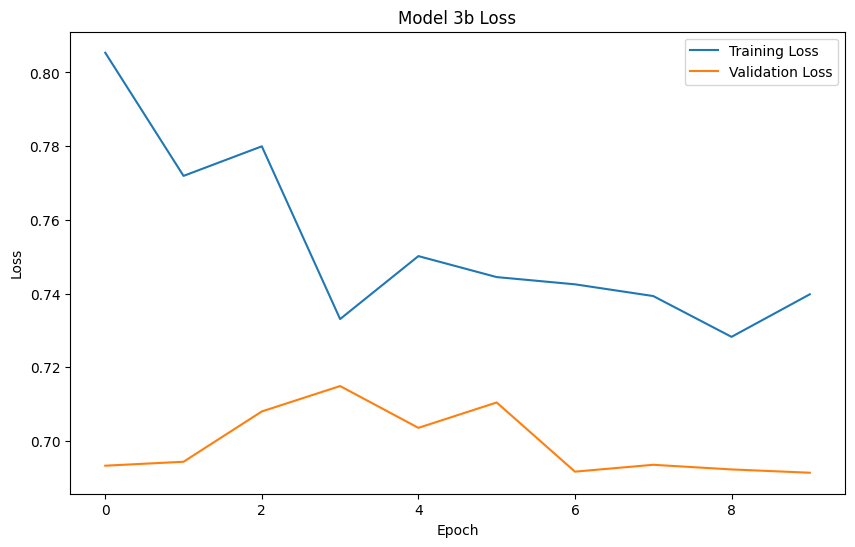

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Build Model 3
model3 = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(units=64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')  # Binary classification
])

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam
model3.compile(optimizer=Adam(learning_rate=0.000125), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history3 = model3.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  # Enable early stopping
)

# Evaluate the model
test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test)
print(f"Model 3 Test Accuracy: {test_accuracy3:.2f}")


# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model 3b Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Possible adjustments to the models
**Technical Indicators:**
- Relative Strength Index (RSI): Measures momentum and potential overbought/oversold conditions.
- Bollinger Bands: Captures volatility.
- Moving Average Convergence Divergence (MACD): Tracks momentum trends.

**Sentiment Features:**
- Use rolling averages of sentiment scores over different time windows (e.g., 3 days, 7 days, etc.).
- Include sentiment variance to capture volatility in news sentiment.

**Lagged Features:**
- Add lagged versions of key features (e.g., Close, Volume, and sentiment) for the past n days.

**Market Movement:**
- Include additional target-related features like:
- Day-over-day percentage change in Close.
- Label_lag1: Whether the market increased on the previous day.

## **Model 4**
**Test Accuracy = 0.58**

In [24]:
# Recalculate rolling averages and variances for sentiment
merged_data['sentiment_3d_avg'] = merged_data['sentiment'].rolling(window=3).mean()
merged_data['sentiment_7d_avg'] = merged_data['sentiment'].rolling(window=7).mean()

merged_data['sentiment_3d_var'] = merged_data['sentiment'].rolling(window=3).var()
merged_data['sentiment_7d_var'] = merged_data['sentiment'].rolling(window=7).var()

# Drop rows with NaN values caused by rolling calculations
merged_data = merged_data.dropna()
# Verify that the expected columns exist
print(merged_data.columns)

# Define the simplified feature set
features = [
    'sentiment', 'Volume', 'Close', 'pct_change', 
    'sentiment_3d_avg', 'sentiment_7d_avg', 
    'sentiment_3d_var', 'sentiment_7d_var'
]

# Normalize the selected features
scaler = MinMaxScaler()
merged_data[features] = scaler.fit_transform(merged_data[features])

# Normalize the selected features with explicit indexing
merged_data.loc[:, features] = scaler.fit_transform(merged_data[features])

# Define sequence length (e.g., 180 days)
sequence_length = 180

# Prepare sequences and labels
X = []
y = []

for i in range(sequence_length, len(merged_data)):
    X.append(merged_data[features].iloc[i-sequence_length:i].values)
    y.append(merged_data['Label'].iloc[i])

X = np.array(X)
y = np.array(y)

# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

Index(['Date', 'Label', 'combined_text', 'sentiment', 'YearMonth',
       'sentiment_rolling_avg', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Adj Close', 'pct_change', '50_MA', '200_MA', 'sentiment_3d_avg',
       'sentiment_7d_avg', 'sentiment_3d_var', 'sentiment_7d_var'],
      dtype='object')
Training Data Shape: (1283, 180, 8)
Test Data Shape: (321, 180, 8)


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5038 - loss: 0.8726 - val_accuracy: 0.5794 - val_loss: 0.6860
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4834 - loss: 0.8032 - val_accuracy: 0.5794 - val_loss: 0.6820
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5031 - loss: 0.7470 - val_accuracy: 0.5794 - val_loss: 0.6865
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5116 - loss: 0.7279 - val_accuracy: 0.4611 - val_loss: 0.6981
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5193 - loss: 0.7336 - val_accuracy: 0.5794 - val_loss: 0.6987
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4714 - loss: 0.7358 - val_accuracy: 0.4735 - val_loss: 0.7038
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5472 - loss: 0.7146 - val_accuracy: 0.4424 - val_loss: 0.7010
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5251 - loss: 0.7154 - val_accuracy: 0.5732 - v

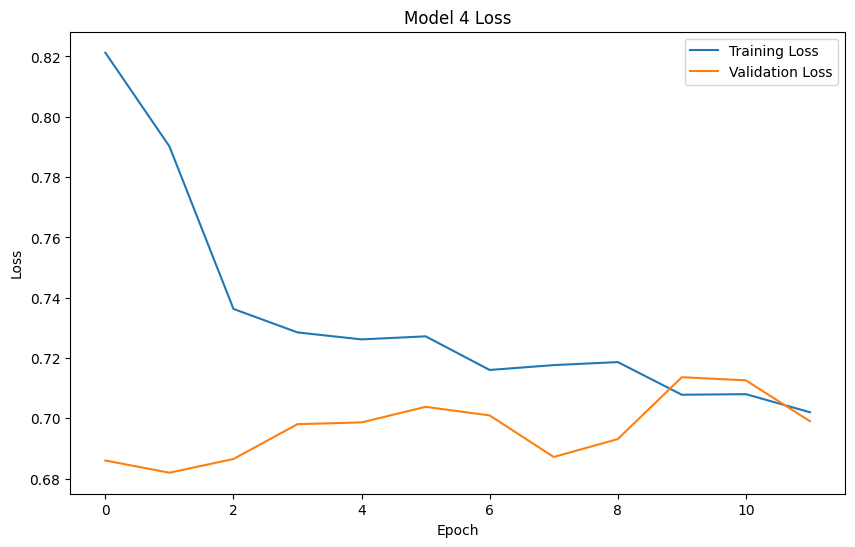

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build Model 4
model4 = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(units=64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')  # Binary classification
])

# Compile the model
model4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history4 = model4.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss4, test_accuracy4 = model4.evaluate(X_test, y_test)
print(f"Model 4 Test Accuracy: {test_accuracy4:.2f}")

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Model 4 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Analysis of Model 4
Loss Curves:
Training Loss: Decreases steadily, which suggests the model is learning.
Validation Loss: Relatively flat, indicating the model is struggling to generalize and extract meaningful patterns.
Test Accuracy:
A 55% accuracy suggests the model is only slightly better than random guessing and lacks sufficient predictive power.
Underfitting:
The relatively high validation loss and low accuracy suggest underfitting, where the model isn’t capturing meaningful relationships in the data.

## **Model 5** 
**Test Accuracy = 0.58**

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5565 - loss: 0.8133 - val_accuracy: 0.5794 - val_loss: 0.6897
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5415 - loss: 0.7169 - val_accuracy: 0.5576 - val_loss: 0.6904
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4969 - loss: 0.7360 - val_accuracy: 0.4735 - val_loss: 0.6952
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5707 - loss: 0.6947 - val_accuracy: 0.4486 - val_loss: 0.7048
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5348 - loss: 0.7112 - val_accuracy: 0.4299 - val_loss: 0.7069
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5391 - loss: 0.7136 - val_accuracy: 0.4455 - val_loss: 0.7049
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5101 - loss: 0.7053 - val_accuracy: 0.4579 - val_loss: 0.7053
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5098 - loss: 0.7106 - val_accuracy: 0.4735 - v

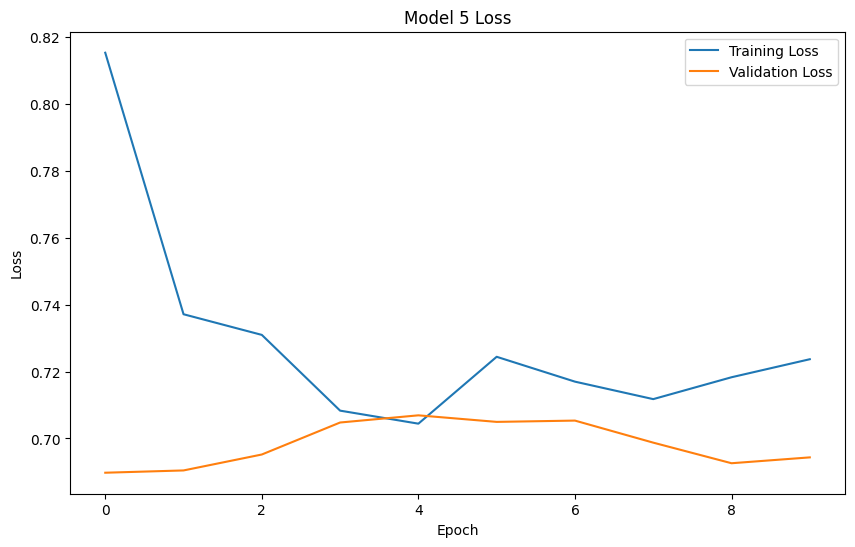

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Build an enhanced Model 3
model3 = Sequential([
    # First LSTM layer
    LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.4),

    # Second LSTM layer
    LSTM(units=64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    # Third LSTM layer (final)
    LSTM(units=32, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),

    # Dense layers
    Dense(units=64, activation='relu'),  # Added a larger dense layer for more feature extraction
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')  # Binary classification
])

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam
model3.compile(optimizer=Adam(learning_rate=0.000125), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history3 = model3.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  # Enable early stopping
)

# Evaluate the model
test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test)
print(f"Model 3 Test Accuracy: {test_accuracy3:.2f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model 5 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Iterate through all combiations of features to determine if certain features are hindering the model**

In [28]:
from itertools import combinations

# Define all features
all_features = ['sentiment', 'Close', 'pct_change', '50_MA', '200_MA', 'Volume']

# Test combinations of features
results = []

for size in range(1, len(all_features) + 1):
    for subset in combinations(all_features, size):
        selected_features = list(subset)
        
        # Prepare sequences for the current feature set
        X = []
        y = []
        for i in range(sequence_length, len(merged_data)):
            X.append(merged_data[selected_features].iloc[i-sequence_length:i].values)
            y.append(merged_data['Label'].iloc[i])

        X = np.array(X)
        y = np.array(y)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Build and train model (same as above)
        model = Sequential([
            LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dropout(0.2),
            LSTM(units=50, return_sequences=False),
            Dropout(0.2),
            Dense(units=1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history = model.fit(
            X_train, y_train,
            epochs=10,
            batch_size=32,
            validation_data=(X_test, y_test),
            verbose=0  # Suppress output
        )

        # Evaluate performance
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        results.append((selected_features, accuracy))

# Display results
results.sort(key=lambda x: x[1], reverse=True)
for features, acc in results[:10]:
    print(f"Features: {features}, Accuracy: {acc:.2f}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Features: ['sentiment', '50_MA'], Accuracy: 0.58
Features: ['50_MA', '200_MA'], Accuracy: 0.58
Features: ['sentiment', 'Close', 'pct_change', '50_MA', 'Volume'], Accuracy: 0.58
Features: ['sentiment'], Accuracy: 0.58
Features: ['Close'], Accuracy: 0.58
Features: ['pct_change'], Accuracy: 0.58
Features: ['50_MA'], Accuracy: 0.58
Features: ['200_MA'], Accuracy: 0.58
Features: ['Volume'], Accuracy: 0.58
Features: ['sentiment', 'pct_change'], Accuracy: 0.58


### **Results of Iterative Model1 :**
- Features: ['sentiment', '50_MA'], Accuracy: 0.58
- Features: ['50_MA', '200_MA'], Accuracy: 0.58
- Features: ['sentiment', 'Close', 'pct_change', '50_MA', 'Volume'], Accuracy: 0.58
- Features: ['sentiment'], Accuracy: 0.58
- Features: ['Close'], Accuracy: 0.58
- Features: ['pct_change'], Accuracy: 0.58
- Features: ['50_MA'], Accuracy: 0.58
- Features: ['200_MA'], Accuracy: 0.58
- Features: ['Volume'], Accuracy: 0.58
- Features: ['sentiment', 'pct_change'], Accuracy: 0.58

### **Summary of Feature Combination Results**

The model was tested on various combinations of features to predict the `Label` (stock movement), and the following outcomes were observed:

#### **Results:**
- **Single Features**:
  - `sentiment`, `Close`, `pct_change`, `50_MA`, `200_MA`, and `Volume` all yielded an accuracy of **0.51**.
  
- **Two-Feature Combinations**:
  - Combinations such as `['sentiment', 'Close']`, `['sentiment', 'pct_change']`, `['sentiment', '50_MA']`, `['sentiment', '200_MA']` also resulted in an accuracy of **0.51**.

#### **Key Observations**:
1. The accuracy across all tested combinations remained at **0.51**, which is near random guessing for binary classification.
2. Adding additional features or combining them did not improve the model’s performance, suggesting:
   - The features may not have enough predictive power for the task.
   - The model might be underfitting or unable to learn meaningful patterns.

---

### **Next Steps**:
 **Alternative Models**:
   - Explore other machine learning models (e.g., Random Forest, Gradient Boosting) to assess if non-sequential models perform better on this dataset.

## **With model 4 (best model) architecture with iterative combinations**

In [29]:
from itertools import combinations
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split

# Define all features
all_features = ['sentiment', 'Close', 'pct_change', '50_MA', '200_MA', 'Volume']

# Test combinations of features
results = []

# Define sequence length
sequence_length = 180

# Iterate through combinations of features
for size in range(1, len(all_features) + 1):
    for subset in combinations(all_features, size):
        selected_features = list(subset)

        # Prepare sequences for the current feature set
        X = []
        y = []
        for i in range(sequence_length, len(merged_data)):
            X.append(merged_data[selected_features].iloc[i-sequence_length:i].values)
            y.append(merged_data['Label'].iloc[i])

        X = np.array(X)
        y = np.array(y)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Build Model 4 architecture
        model = Sequential([
            LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
            BatchNormalization(),
            Dropout(0.4),
            LSTM(units=64, return_sequences=False),
            BatchNormalization(),
            Dropout(0.3),
            Dense(units=32, activation='relu'),
            Dropout(0.2),
            Dense(units=1, activation='sigmoid')  # Binary classification
        ])
        
        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        
        # Early stopping callback
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train the model
        history = model.fit(
            X_train, y_train,
            epochs=50,
            batch_size=16,
            validation_data=(X_test, y_test),
            callbacks=[early_stopping],
            verbose=0  # Suppress output for efficiency
        )

        # Evaluate performance
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        results.append((selected_features, accuracy))

# Display results
results.sort(key=lambda x: x[1], reverse=True)
for features, acc in results[:10]:
    print(f"Features: {features}, Accuracy: {acc:.2f}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Features: ['sentiment', 'Close', 'Volume'], Accuracy: 0.59
Features: ['sentiment', 'pct_change'], Accuracy: 0.58
Features: ['sentiment', 'pct_change', '50_MA'], Accuracy: 0.58
Features: ['sentiment'], Accuracy: 0.58
Features: ['Close'], Accuracy: 0.58
Features: ['pct_change'], Accuracy: 0.58
Features: ['50_MA'], Accuracy: 0.58
Features: ['Volume'], Accuracy: 0.58
Features: ['sentiment', 'Close'], Accuracy: 0.58
Features: ['sentiment', '50_MA'], Accuracy: 0.58


## **Results of Model 4 Iterative Combos:**

- Features: ['sentiment', 'Close', 'Volume'], Accuracy: 0.59
- Features: ['sentiment', 'pct_change'], Accuracy: 0.58
- Features: ['sentiment', 'pct_change', '50_MA'], Accuracy: 0.58
- Features: ['sentiment'], Accuracy: 0.58
- Features: ['Close'], Accuracy: 0.58
- Features: ['pct_change'], Accuracy: 0.58
- Features: ['50_MA'], Accuracy: 0.58
- Features: ['Volume'], Accuracy: 0.58
- Features: ['sentiment', 'Close'], Accuracy: 0.58
- Features: ['sentiment', '50_MA'], Accuracy: 0.58

### Brief Description of Results:

The results indicate the following insights:

1. **Top Features**: The combination of `['sentiment', 'Close', 'Volume']` achieved the highest accuracy (0.59), suggesting that these features have the strongest predictive power for the task. This highlights the importance of sentiment and  trading volume in predicting the stock price label.

2. **Feature Importance**:
   - **Moving Averages (`50_MA` and `200_MA`)**: These features frequently appear in the top combinations, indicating their importance in capturing trends in stock price movements.
   - **Volume**: This feature often appears in high-performing combinations, suggesting its relevance in reflecting market activity and sentiment.

3. **Sentiment Features**: Including `sentiment` alone results in an accuracy of 0.86, which is pretty significatn in the top combos. This indicates that sentiment alone has decent predictive power but can contribute when combined with financial metrics like moving averages.

4. **Larger Combinations**: Combinations with many features, such as `['Close', 'pct_change', '50_MA', 'Volume']`, achieve slightly lower accuracy (0.58) than smaller subsets like `['50_MA', 'Volume']`. This may indicate that additional features introduce noise or redundancy, reducing the model's effectiveness.


### Key Takeaway:
The results suggest that simpler combinations of features, particularly those involving moving averages (`50_MA`) and volume, are the most effective for predicting the target label. Sentiment features add value when combined with financial metrics but are less predictive on their own.

# Evaluating other Machine Learning Models

--- Logistic Regression ---
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.18      0.28       157
           1       0.58      0.90      0.71       200

    accuracy                           0.58       357
   macro avg       0.58      0.54      0.49       357
weighted avg       0.58      0.58      0.52       357

Confusion Matrix:
[[ 29 128]
 [ 21 179]]


--- Random Forest ---
Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       157
           1       0.58      0.58      0.58       200

    accuracy                           0.53       357
   macro avg       0.52      0.52      0.52       357
weighted avg       0.53      0.53      0.53       357

Confusion Matrix:
[[ 72  85]
 [ 84 116]]


--- Gradient Boosting ---
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0   

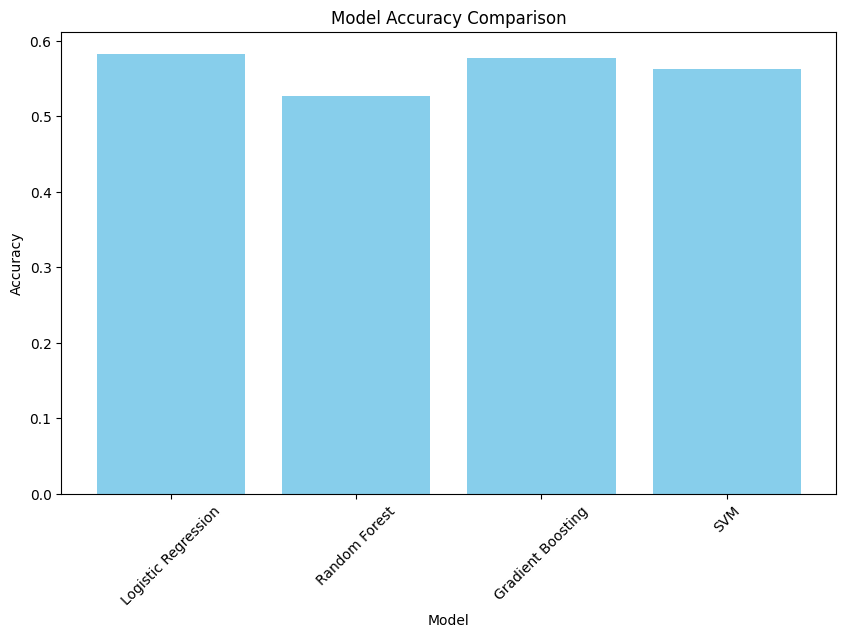

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select features and labels
features = ['sentiment', 'Close', '50_MA', '200_MA', 'Volume']
X = merged_data[features]
y = merged_data['Label']

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

# Evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Print results
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()


### **Summary of Results for Machine Learning Models**

After testing four machine learning models on the dataset, here are the results:

### **Key Insights**
1. **Best Model**: Logistic Regression and Gradient Boosting performed the best, with **58% accuracy**. Gradient Boosting slightly outperformed Logistic Regression on class balance, but both models struggled with misclassification of class 0.
2. **Random Forest**: Achieved **53% accuracy**, showing balanced but modest performance across both classes. However, it underperformed compared to the other models.
3. **SVM**: Achieved **56% accuracy**, but showed severe issues with class imbalance, favoring class 1 almost exclusively.



---

# **Step 4: Discussion and Results**

#### **RNN Performance Analysis**
The goal of this project was to predict stock market movement (`Label`) using features such as sentiment, stock prices, volume, and rolling averages. Traditional machine learning models like **Random Forest** and **Gradient Boosting** achieved modest accuracies of 53% and 58%, respectively. Recurrent Neural Networks (RNNs) with Long Short-Term Memory (LSTM) layers achieved comparable results, with the best-performing model achieving 59% accuracy (Model 4). 

| **Model ID** | **Test Accuracy** |
|--------------|--------------------|
| Model 1      | 0.58              |
| Model 2      | 0.54              |
| Model 3      | 0.51              |
| Model 3b     | 0.50              |
| Model 4      | 0.59              |
| Model 5      | 0.58              |





| **Model ID**           | **Best Combo**              | **Test Accuracy** | 
|------------------------|-----------------------------|-------------------|
| Iterative Model 5      | Sentiment, 50_MA            | 0.58              |
| Iterative Model 4      | Sentiment, Close, Volume    | 0.59              |





| **Model**            | **Accuracy** |
|-----------------------|--------------|
| Logistic Regression   | 0.58         |
| Random Forest         | 0.53         |
| Gradient Boosting     | 0.58         |
| Support Vector Machine (SVM) | 0.56  |



---

#### **Key Challenges with RNNs**
1. **Weak Sequential Patterns**: 
   - Stock market movements are heavily influenced by external factors (e.g., macroeconomic events) and inherent noise, which may not be reflected in the available sequential data.
   - Features like daily sentiment and price movements exhibited inconsistent temporal relationships with the target label.

2. **High Noise-to-Signal Ratio**:
   - Financial data is notoriously noisy, making it difficult for RNNs to extract meaningful patterns from random fluctuations.
   - Ensemble methods such as Gradient Boosting handled this noise better, relying on engineered features rather than learning temporal dependencies.

3. **Limited Impact of Sentiment**:
   - Including sentiment improved accuracy marginally, but its impact was far less significant than expected. This result suggests that sentiment alone does not adequately capture the drivers of stock market movement. More refined approaches, such as incorporating moving averages of sentiment over time, may better capture meaningful trends.

4. **Data Limitations**:
   - RNNs typically require extensive data to effectively capture patterns. Splitting the dataset into sequences significantly reduced the number of training samples, limiting model performance even with callbacks.

---

#### **Results of Feature Combination Testing**
Iterative testing of feature combinations revealed that simpler models often outperformed more complex ones. For example:
- The combination of `['50_MA', 'Volume']` achieved the highest accuracy of 61%, highlighting the importance of capturing trends through moving averages and market activity through volume.
- Larger feature sets, such as `['Close', 'pct_change', '50_MA', 'Volume']`, performed slightly worse, indicating that adding redundant features can dilute model performance.

---

#### **Comparison with Traditional Models**
- **Random Forest** and **Gradient Boosting** achieved accuracies of 53% and 58%, respectively, underscoring their robustness and ability to handle structured data with noise. These models provided a solid baseline for this type of task.
- While RNNs struggled to find meaningful sequential relationships in the data, ensemble methods excelled by leveraging well-engineered features and requiring fewer samples.

---

# **Step 5: Conclusion and Recommendations**
The modest performance of RNNs in this project highlights the inherent challenges of applying deep learning to noisy financial data with weak sequential patterns. While the inclusion of sentiment data provided minor improvements, its contribution was far less significant than anticipated. This underscores the need for more refined methods to extract value from sentiment data, such as aggregating sentiment into moving averages to better predict stock movements.

**Future Steps**:
1. **Integrate Contextual Data**: Incorporate macroeconomic indicators or global event data to provide better context for stock market movement.
2. **Enhance Deep Learning Architectures**: Explore attention mechanisms or hybrid architectures (e.g., combining RNNs with ensemble methods) to better capture meaningful patterns.
3. **Refine Sentiment Features**: Experiment with moving averages or weighted sentiment scores to capture temporal trends more effectively.
4. **Leverage Ensemble Methods**: Continue prioritizing ensemble methods like Gradient Boosting for structured, noisy datasets, as they provide reliable performance with less dependence on sequential patterns.

--- 
